In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
data = pd.read_csv("data.csv", sep=';')
columns = data.columns
for columnName in columns:
    for index in range(len(data)):
        if random.random()<=.1:
            data.at[index, columnName] = None
    # uzupelnienie
    if(data[columnName].dtype == 'float64'):
        data[columnName].fillna(data[columnName].median(skipna=True), inplace=True)
    else:
        data[columnName].fillna(data[columnName].mode()[0], inplace=True)

In [6]:
data.head()

,"baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health"
0,"120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2...."
1,"132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0..."
2,"133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0..."
3,"134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0..."
4,"132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0..."


In [9]:
print(data)
plt.hist(data['fetal_health'])
plt.title("Histogram zdrowi płodów")

     baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0     120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2....                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1     132.0,0.006,

KeyError: 'fetal_health'

In [4]:
data['league']

0              La Liga
1              La Liga
2              La Liga
3              La Liga
4              Serie A
             ...      
2639    Premier League
2640    Premier League
2641    Premier League
2642    Premier League
2643    Premier League
Name: league, Length: 2644, dtype: object

Text(0.5, 1.0, 'Histogram lig zawodników')

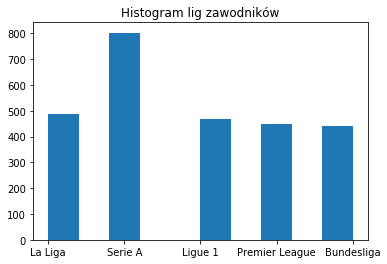

In [5]:
plt.hist(data['league'])
plt.title("Histogram lig zawodników")

In [6]:
data.describe

<bound method NDFrame.describe of       Column1                 player nationality position     squad   age  \
0        21.0  Martin Aguirregabiria      es ESP       DF   AlavĂ©s  23.0   
1       390.0           Oliver Burke      es ESP    MF,FW  Cagliari  22.0   
2       430.0       VĂ­ctor Camarasa      es ESP       MF   AlavĂ©s  25.0   
3      1360.0          RubĂ©n Duarte      es ESP       DF   AlavĂ©s  23.0   
4       770.0            Rodrigo Ely      br BRA       DF   AlavĂ©s  25.0   
...       ...                    ...         ...      ...       ...   ...   
2639   1997.0         Daniel Podence      es ESP    FW,MF    Wolves  23.0   
2640   2202.0          Romain SaĂŻss      es ESP       DF    Wolves  29.0   
2641   2523.0          Adama TraorĂ©      es ESP    FW,MF    Wolves  23.0   
2642   2567.0         JesĂşs Vallejo      es ESP       DF    Wolves  22.0   
2643   2615.0         RĂşben Vinagre      es ESP       DF    Wolves  20.0   

      birth_year       value  height     

Text(0.5, 1.0, 'Histogram wzrostu zawodników')

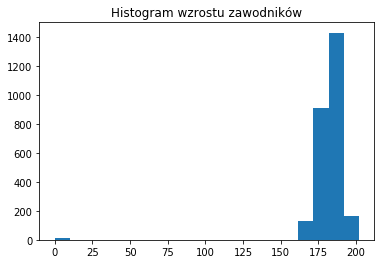

In [7]:
plt.hist(data['height'],20)
plt.title("Histogram wzrostu zawodników")

Text(0.5, 1.0, 'Histogram ilości meczów w których zagrał zawodnik')

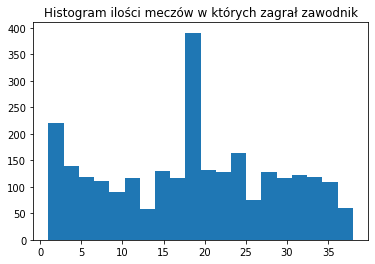

In [8]:
plt.hist(data['games'],20)
plt.title("Histogram ilości meczów w których zagrał zawodnik")

Text(0.5, 1.0, 'Histogram ilości minut które rozegrał zawodnik')

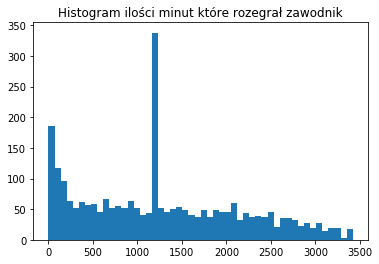

In [9]:
plt.hist(data['minutes'],50)
plt.title("Histogram ilości minut które rozegrał zawodnik")

Text(0.5, 1.0, 'Histogram średnia ilość bramek zdbytych w 90 minut')

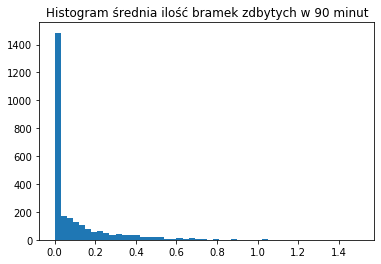

In [10]:
ga_p90 = data['goals_per90']
plt.hist(ga_p90, 50, range=(0,1.5))
plt.title("Histogram średnia ilość bramek zdbytych w 90 minut")

Text(0.5, 1.0, 'Histogram średnia ilość asyst zdbytych w 90 minut')

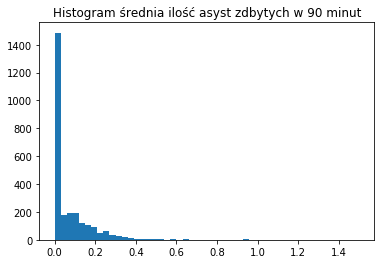

In [11]:
ass_p90 = data['assists_per90']
plt.hist(ass_p90, 50, range=(0,1.5))
plt.title("Histogram średnia ilość asyst zdbytych w 90 minut")

Text(0.5, 1.0, 'Wykres ilości zawodników z podziałem na pozycje')

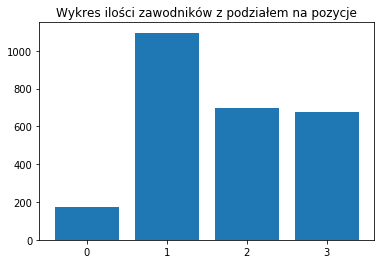

In [12]:
gk = 0
defender = 0
midfield = 0
attack = 0
    
for index, ele in enumerate(data['position2']):
    name = ele.lower()
    value_to_set = 0
    if 'goalkeeper' in name:
        value_to_set = 0
        gk += 1
    elif 'defender' in name:
        value_to_set = 1
        defender += 1
    elif 'midfield' in name:
        value_to_set = 2
        midfield += 1
    elif 'forward' in name:
        value_to_set = 3
        attack = attack + 1
    else:
        print("Other position")
    data.loc[index, 'position2'] = value_to_set

l = [gk, defender, midfield, attack]
fig, ax = plt.subplots()
ax.bar(np.arange(4), l)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(('0', '1', '2', '3'))
plt.title("Wykres ilości zawodników z podziałem na pozycje")


In [13]:
from sklearn.preprocessing import LabelEncoder
 
labelEncodedColumns = ['player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league', 'Attendance', 'Season']
 
le = LabelEncoder()
 
for columnName in labelEncodedColumns:
    data[columnName] = le.fit_transform(data[columnName])
data2 = data[['goals_per90', 'assists_per90', 'cards_yellow', 'shots_total_per90', 'passes_short', 'passes_medium', 'passes_long', 'passes_into_penalty_area','pressures','blocks','blocked_shots','interceptions','dribbles','fouls','goals_against_per90_gk', 'saves', 'clean_sheets']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EDFD075C8>,
      dtype=object)

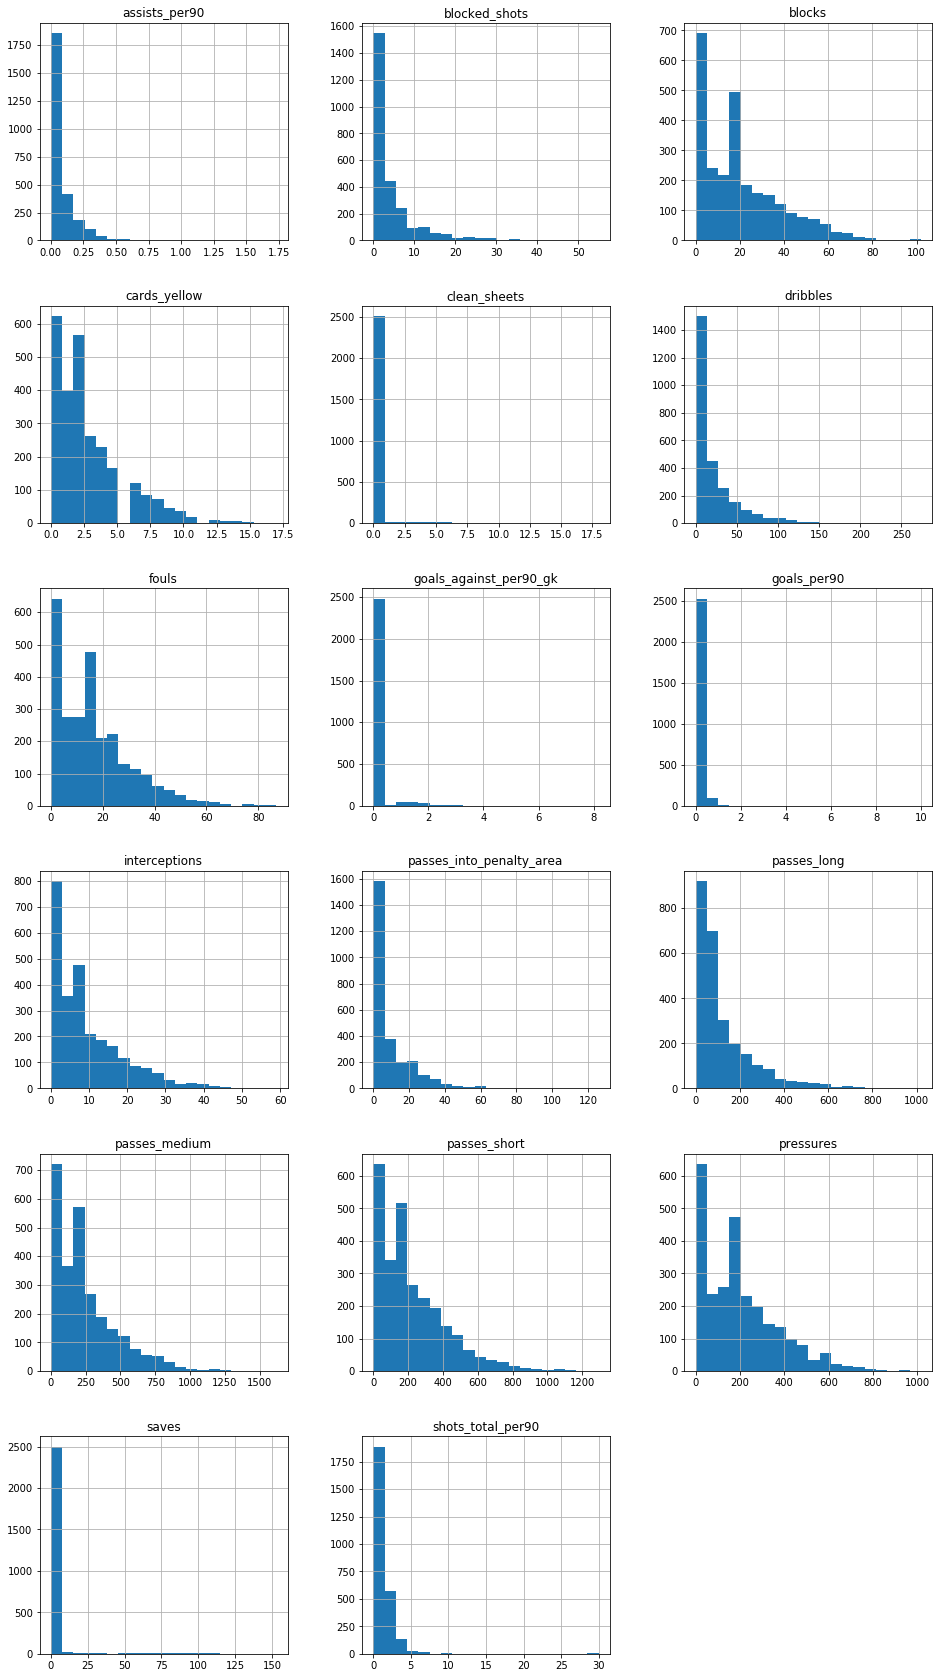

In [14]:
data2.hist(figsize = (16,30), column=data2.columns, layout=(6, 3), bins = 20)

In [15]:
for i in range(len(data2)):
    minutes = data.loc[i, "minutes"]
    if minutes > 90:
        scale = 90 / minutes
        data2.iloc[i, data2.columns.get_loc("cards_yellow")] *= scale
        data2.iloc[i, data2.columns.get_loc("passes_short")] *= scale
        data2.iloc[i, data2.columns.get_loc("passes_medium")] *= scale
        data2.iloc[i, data2.columns.get_loc("passes_long")] *= scale
        data2.iloc[i, data2.columns.get_loc("passes_into_penalty_area")] *= scale
        data2.iloc[i, data2.columns.get_loc("pressures")] *= scale
        data2.iloc[i, data2.columns.get_loc("blocks")] *= scale
        data2.iloc[i, data2.columns.get_loc("blocked_shots")] *= scale
        data2.iloc[i, data2.columns.get_loc("interceptions")] *= scale
        data2.iloc[i, data2.columns.get_loc("dribbles")] *= scale
        data2.iloc[i, data2.columns.get_loc("fouls")] *= scale
        data2.iloc[i, data2.columns.get_loc("saves")] *= scale
        data2.iloc[i, data2.columns.get_loc("clean_sheets")] *= scale
data2

D:\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher

,goals_per90,assists_per90,cards_yellow,shots_total_per90,passes_short,passes_medium,passes_long,passes_into_penalty_area,pressures,blocks,blocked_shots,interceptions,dribbles,fouls,goals_against_per90_gk,saves,clean_sheets
0,0.04,0.04,0.379747,0.13,29.240506,30.987342,13.063291,1.063291,18.835443,2.962025,0.607595,0.683544,1.974684,2.430380,0.0,0.0,0.0
1,0.06,0.13,0.125962,0.84,12.029391,5.983205,1.007698,0.377887,17.004899,1.574528,0.125962,0.377887,2.771169,1.196641,0.0,0.0,0.0
2,0.00,0.00,0.075949,0.56,16.860759,15.265823,7.139241,0.911392,19.291139,1.215190,0.151899,0.759494,2.202532,1.063291,0.0,0.0,0.0
3,0.00,0.03,0.371761,0.68,15.512580,18.858430,8.415321,0.168982,11.761172,2.095381,0.067593,0.642133,0.337965,0.473151,0.0,0.0,0.0
4,0.08,0.00,0.381895,0.25,7.807638,15.106082,12.390382,0.000000,6.789250,0.678925,0.848656,0.509194,0.169731,1.442716,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,0.31,0.00,0.000000,3.11,15.882353,10.899654,3.737024,0.934256,13.391003,1.557093,0.311419,0.000000,3.737024,4.359862,0.0,0.0,0.0
2640,0.07,0.03,0.399261,0.77,11.378928,25.918669,12.709797,0.299445,11.412200,1.929760,0.632163,0.199630,0.299445,1.430684,0.0,0.0,0.0
2641,0.14,0.00,0.034549,1.52,7.669866,5.769674,3.005758,0.483685,6.080614,0.449136,0.103647,0.034549,0.414587,1.347409,0.0,0.0,0.0
2642,0.00,0.00,1.104294,0.00,13.251534,25.398773,18.220859,0.552147,11.042945,8.834356,1.656442,0.000000,0.552147,1.104294,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

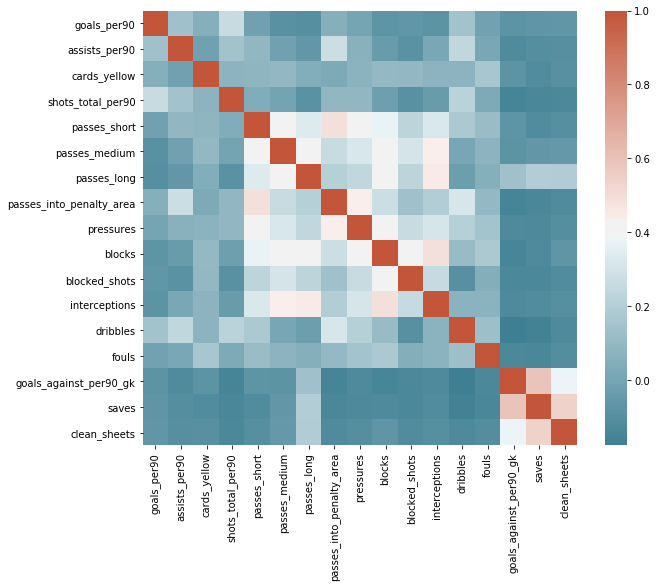

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True, ax=ax)

In [18]:
columns = data2.columns
scaled = pd.DataFrame(StandardScaler().fit_transform(data2), columns=columns)
scaled

,goals_per90,assists_per90,cards_yellow,shots_total_per90,passes_short,passes_medium,passes_long,passes_into_penalty_area,pressures,blocks,blocked_shots,interceptions,dribbles,fouls,goals_against_per90_gk,saves,clean_sheets
0,-0.218645,-0.241127,0.544918,-0.656030,0.471558,0.455994,0.286178,0.303498,0.097541,0.542926,0.671167,-0.023744,0.108168,0.648287,-0.226008,-0.204311,-0.190185
1,-0.154608,0.445713,-0.346849,-0.229401,-0.265364,-0.532390,-0.652252,-0.360510,0.010521,-0.043804,-0.405623,-0.307665,0.510297,-0.117367,-0.226008,-0.204311,-0.190185
2,-0.346720,-0.546389,-0.522587,-0.397649,-0.058501,-0.165459,-0.174961,0.156341,0.119204,-0.195756,-0.347636,0.046804,0.223204,-0.200123,-0.226008,-0.204311,-0.190185
3,-0.346720,-0.317443,0.516857,-0.325542,-0.116225,-0.023448,-0.075629,-0.562893,-0.238756,0.176449,-0.536120,-0.062211,-0.718178,-0.566362,-0.226008,-0.204311,-0.190185
4,-0.090570,-0.546389,0.552467,-0.583924,-0.446125,-0.171773,0.233797,-0.726600,-0.475112,-0.422526,1.210110,-0.185696,-0.803115,0.035346,-0.226008,-0.204311,-0.190185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,0.645861,-0.546389,-0.789464,1.134612,-0.100393,-0.338048,-0.439796,0.178491,-0.161277,-0.051176,0.009003,-0.658677,0.997938,1.845717,-0.226008,-0.204311,-0.190185
2640,-0.122589,-0.317443,0.613487,-0.271463,-0.293214,0.255635,0.258661,-0.436502,-0.255346,0.106413,0.726093,-0.473244,-0.737625,0.027879,-0.226008,-0.204311,-0.190185
2641,0.101542,-0.546389,-0.668063,0.179202,-0.452024,-0.540830,-0.496719,-0.258014,-0.508799,-0.519697,-0.455514,-0.626585,-0.679492,-0.023801,-0.226008,-0.204311,-0.190185
2642,-0.346720,-0.546389,3.090885,-0.734146,-0.213036,0.235084,0.687652,-0.191689,-0.272899,3.026152,3.016081,-0.658677,-0.610041,-0.174677,-0.226008,-0.204311,-0.190185


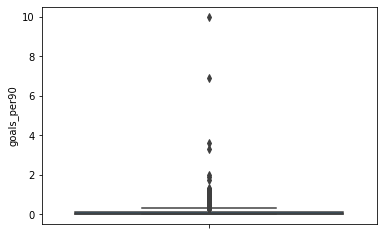

In [19]:
sns.boxplot(y='goals_per90', data=data2)

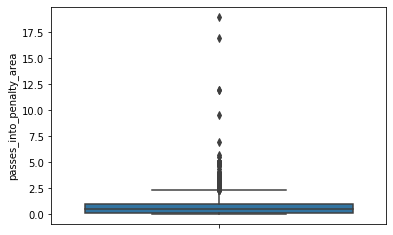

In [20]:
sns.boxplot(y='passes_into_penalty_area', data=data2)

In [21]:
from sklearn.decomposition import PCA
X = scaled
Y = data['position2']
np.nan_to_num(X)
pca = PCA(n_components=0.95)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA = pd.DataFrame(X_PCA)
X_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.116556,0.260124,-0.619637,0.384109,-0.610093,-0.208647,-0.397941,0.250983,0.029500,0.206988,-0.241555,0.361984,-0.017838,-0.001261,0.144261
1,-0.624794,-0.782193,0.062811,-0.484008,-0.446972,0.073768,0.174720,0.059673,0.483477,-0.022479,0.178631,-0.042722,0.192772,-0.306647,-0.113787
2,-0.177179,-0.103816,-0.278094,-0.622723,-0.342674,0.436470,0.051255,-0.415938,0.197972,0.487627,-0.054309,-0.100741,0.042908,0.185743,0.009887
3,-0.492292,0.150462,-0.867521,0.024712,0.182306,-0.515437,0.165915,-0.492962,-0.039425,0.249444,-0.056979,-0.552843,-0.122810,-0.329517,0.186968
4,-0.487532,0.356456,-1.586129,0.426121,0.298847,-0.428645,-0.509308,0.484975,0.048820,-0.155419,-0.144750,0.301283,-0.148059,0.581799,-0.334453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,-0.049961,-1.326700,0.484104,0.869559,-0.575631,1.895773,0.085751,0.365022,-0.417280,-0.163919,-0.164775,0.915243,-0.088749,0.098314,0.092101
2640,-0.089109,0.255015,-1.148697,0.450304,0.245737,-0.404000,-0.432895,0.207831,-0.159286,-0.266859,-0.248876,0.127242,-0.018562,0.230719,0.200300
2641,-1.357800,-0.492713,-0.504032,-0.310459,0.146217,0.628276,-0.078797,-0.055831,-0.523617,0.121026,-0.180131,-0.164686,-0.263619,0.055061,0.180738
2642,1.937976,1.074517,-2.433485,2.083885,0.445812,-1.554573,-1.778095,0.690855,1.801689,-1.093846,-0.221616,0.608603,-0.928794,-0.609552,1.401957


In [22]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from collections import namedtuple

In [23]:
def print_bold(text):
    print('\033[1m' + text + '\033[0m\n')
    
def plot_confusion_matrix(matrix, description):
    ax = sns.heatmap(matrix, annot=True, fmt="d",cmap='Blues')

    ax.set_title(description);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['0','1','2','3'])
    ax.yaxis.set_ticklabels(['0','1','2','3'])
    plt.show()
    
def create_and_plot_confusion_matrix(y, pred, name):
    matrix = confusion_matrix(y, pred)
    plot_confusion_matrix(matrix, 'Confusion Matrix for %s\n' %(name))
    
def print_score(y, pred, data_name, classifier_name):
    accuracy = accuracy_score(y, pred)
    f1 = f1_score(y, pred, average='weighted')
    print("Dane %s:" %(data_name))
    print("Klasyfikator: %s" %(classifier_name))
    print('Accuracy: %.2f' %(accuracy*100))
    print('F1: %.2f' % (f1*100))
        
def test_classifier_with_test_data(classifier, x_data, y_data):
    name = classifier.name
    prediction = classifier.classifier.predict(x_data)
    print_score(y_data, prediction, "testowe", name)
    create_and_plot_confusion_matrix(y_data, prediction, name)
    
def test_classifier_with_training_data(classifier, x_data,y_data):
    prediction_train = classifier.classifier.predict(x_data)
    print_score(y_data, prediction_train, "treningowe", classifier.name)
    
def test_classifier(classifier, train_x, train_y, test_x, test_y):
    print_bold("\n\n" + classifier.name)
    classifier.classifier.fit(train_x, train_y)
    test_classifier_with_test_data(classifier, test_x, test_y)
    test_classifier_with_training_data(classifier, train_x, train_y)
    
def test_and_return_score(classifier, train_x, train_y, test_x, test_y):
    classifier.classifier.fit(train_x, train_y)
    prediction = classifier.classifier.predict(test_x)
    accuracy = accuracy_score(test_y, prediction)
    f1 = f1_score(test_y, prediction, average='weighted')
    return (accuracy, f1)

In [24]:
Classifier = namedtuple("Classifier", ["classifier", "name"])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_PCA, Y, train_size=0.80, test_size=0.20, random_state=101)

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

def create_classifiers():
    svc_poly_classifier = SVC(kernel='poly', degree=3, C=1) #polynomial kernel
    svc_poly = Classifier(svc_poly_classifier, "SVM Classifier with polynominal kernel")

    random_forest_classifier = RandomForestClassifier(max_depth=7, n_estimators=12, max_features=1)
    random_forest = Classifier(random_forest_classifier, "Random Forest Classifier")

    logisitic_regression_classifier = LogisticRegression(max_iter=1000)
    logisitic_regression = Classifier(logisitic_regression_classifier, "Logistic Regression Classifier")

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree = Classifier(decision_tree_classifier, "Decision Tree Classifier")
    return [svc_poly, random_forest, logisitic_regression, decision_tree]



SVM Classifier with polynominal kernel

Dane testowe:
Klasyfikator: SVM Classifier with polynominal kernel
Accuracy: 49.34
F1: 40.84


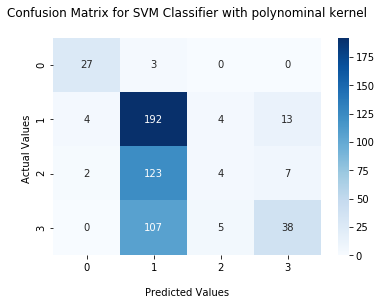

Dane treningowe:
Klasyfikator: SVM Classifier with polynominal kernel
Accuracy: 58.25
F1: 51.17


Random Forest Classifier

Dane testowe:
Klasyfikator: Random Forest Classifier
Accuracy: 65.41
F1: 63.57


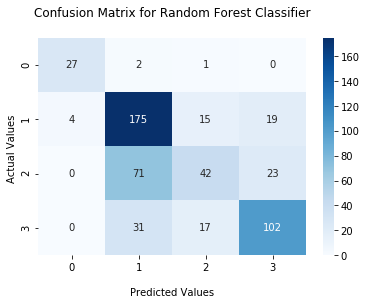

Dane treningowe:
Klasyfikator: Random Forest Classifier
Accuracy: 76.22
F1: 75.27


Logistic Regression Classifier

Dane testowe:
Klasyfikator: Logistic Regression Classifier
Accuracy: 69.19
F1: 67.69


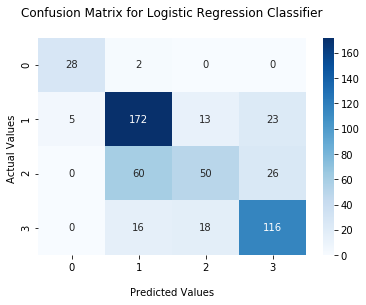

Dane treningowe:
Klasyfikator: Logistic Regression Classifier
Accuracy: 67.38
F1: 65.71


Decision Tree Classifier

Dane testowe:
Klasyfikator: Decision Tree Classifier
Accuracy: 65.60
F1: 65.53


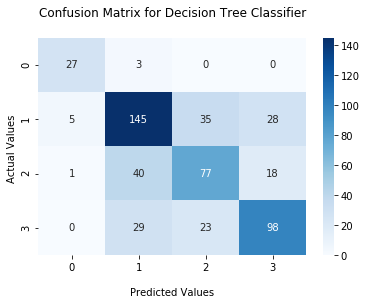

Dane treningowe:
Klasyfikator: Decision Tree Classifier
Accuracy: 99.95
F1: 99.95


In [26]:
classifiers = create_classifiers()

for classifier in classifiers:
    test_classifier(classifier, X_train, y_train, X_test, y_test)

In [27]:
from sklearn.model_selection import StratifiedKFold
accuracy_results = []
f1_results = []
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
i = 0
for train_index, test_index in skf.split(X, Y):
    acc_res = []
    f1_res = []
    skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
    skf_y_train, skf_y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    classifiers = create_classifiers()
    for classifier in classifiers:
        accuracy, f1 = test_and_return_score(classifier, skf_X_train, skf_y_train, skf_X_test, skf_y_test)
        print(i, classifier.name, accuracy, f1)
        acc_res.append(accuracy)
        f1_res.append(f1)
    accuracy_results.append(acc_res)
    f1_results.append(f1_res)
    i += 1

0 SVM Classifier with polynominal kernel 0.5358490566037736 0.4462104463863927
0 Random Forest Classifier 0.7358490566037735 0.7245850671388409
0 Logistic Regression Classifier 0.6641509433962264 0.6507303537663949
0 Decision Tree Classifier 0.6188679245283019 0.6151733664833944
1 SVM Classifier with polynominal kernel 0.539622641509434 0.4549684387083987
1 Random Forest Classifier 0.6679245283018868 0.643975831601321
1 Logistic Regression Classifier 0.660377358490566 0.63231613400077
1 Decision Tree Classifier 0.6226415094339622 0.6213768971135186
2 SVM Classifier with polynominal kernel 0.49433962264150944 0.41185655038976976
2 Random Forest Classifier 0.6792452830188679 0.667156899149228
2 Logistic Regression Classifier 0.6792452830188679 0.6652487450147867
2 Decision Tree Classifier 0.6226415094339622 0.6189190263838883
3 SVM Classifier with polynominal kernel 0.5245283018867924 0.45578932982604276
3 Random Forest Classifier 0.7132075471698113 0.697144974794634
3 Logistic Regressio

In [28]:
accuracy_results = np.array(accuracy_results)
f1_results = np.array(f1_results)
means_accuracy = np.mean(accuracy_results, axis=0)
sd_accuracy = np.std(f1_results, axis=0)
means_f1 = np.mean(f1_results, axis=0)
sd_f1 = np.std(f1_results, axis=0)

In [29]:
for i in range(len(classifiers)):
    print(classifiers[i].name)
    print("means accuracy", means_accuracy[i])
    print("standard deviation accuracy", sd_accuracy[i])
    print("mean f1", means_f1[i])
    print("standard deviation f1", sd_f1[i], "\n")

SVM Classifier with polynominal kernel
means accuracy 0.5245854774156661
standard deviation accuracy 0.03703984262089734
mean f1 0.44349549181626086
standard deviation f1 0.03703984262089734 

Random Forest Classifier
means accuracy 0.7015923384791309
standard deviation accuracy 0.02635463675991878
mean f1 0.6892842292897148
standard deviation f1 0.02635463675991878 

Logistic Regression Classifier
means accuracy 0.6773942252715838
standard deviation accuracy 0.01875166539830802
mean f1 0.6631093894254272
standard deviation f1 0.01875166539830802 

Decision Tree Classifier
means accuracy 0.6199028016009149
standard deviation accuracy 0.025432219907190162
mean f1 0.6192318954956789
standard deviation f1 0.025432219907190162 



In [30]:
from sklearn.ensemble import VotingClassifier
svc_poly_classifier = SVC(kernel='poly', degree=3, C=1) #polynomial kernel
random_forest_classifier = RandomForestClassifier(max_depth=7, n_estimators=12, max_features=1)
logisitic_regression_classifier = LogisticRegression(max_iter=1000)
decision_tree_classifier = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('lr', logisitic_regression_classifier), ('rf', random_forest_classifier), ('dt', decision_tree_classifier)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
np.array_equal(eclf1.named_estimators_.lr.predict(X_train), eclf1.named_estimators_['lr'].predict(X_train))
eclf2 = VotingClassifier(estimators=[('lr', logisitic_regression_classifier), ('rf', random_forest_classifier), ('dt', decision_tree_classifier)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
eclf3 = VotingClassifier(estimators=[('lr', logisitic_regression_classifier), ('rf', random_forest_classifier), ('dt', decision_tree_classifier)], voting='soft', weights=[2,1,1], flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
print(eclf3.transform(X_train).shape)

[1 3 1 ... 2 1 2]
[1 3 2 ... 2 1 2]
[1 3 2 ... 2 1 2]
(2115, 12)


In [31]:
eclf1_predict = eclf1.predict(X_test)
print_score(y_test, eclf1_predict, "Testowe",
            "Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - hard")

Dane Testowe:
Klasyfikator: Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - hard
Accuracy: 67.49
F1: 65.83


In [32]:
eclf2_predict = eclf2.predict(X_test)
print_score(y_test, eclf2_predict, "Testowe",
            "Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - soft")

Dane Testowe:
Klasyfikator: Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - soft
Accuracy: 66.92
F1: 66.64


In [33]:
eclf3_predict = eclf3.predict(X_test)
print_score(y_test, eclf3_predict, "Testowe",
            "Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - soft, weights: [2,1,1]")

Dane Testowe:
Klasyfikator: Voting Classifier - Logistic Regression & Random Forest & Decision Tree, voting - soft, weights: [2,1,1]
Accuracy: 69.00
F1: 68.60


In [34]:
from sklearn.model_selection import GridSearchCV

random_forest_parameters = {'max_depth':[3,5,7,10], 'n_estimators':[3,5,7,10,50,100], 'min_samples_split': [2, 5, 10],
              'max_features': [1,2,3]}

random_forest_base_estimator = RandomForestClassifier(random_state=0)

random_forest_grid = GridSearchCV(random_forest_base_estimator, random_forest_parameters, scoring = 'accuracy')
random_forest_grid.fit(X_train, y_train)
random_forest_grid_predicitions = random_forest_grid.predict(X_test)

print("Grid search for random forest")
print('Accuracy Score : ' + str(accuracy_score(y_test, random_forest_grid_predicitions)))

Grid search for random forest
Accuracy Score : 0.7051039697542533


In [35]:
random_forest_grid.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

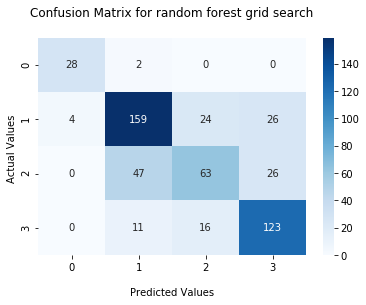

In [36]:
create_and_plot_confusion_matrix(y_test, random_forest_grid_predicitions, "random forest grid search")

In [37]:
svc_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3,5,7], 'C':[0.001, 0.01, 0.1, 1, 2, 3, 10]}
svc_base_estimator = SVC()

svc_grid = GridSearchCV(svc_base_estimator, svc_parameters, scoring = 'accuracy')
svc_grid.fit(X_train, y_train)
svc_grid_predicitions = svc_grid.predict(X_test)

print("Grid search for svm")
print('Accuracy Score : ' + str(accuracy_score(y_test, svc_grid_predicitions)))

Grid search for svm
Accuracy Score : 0.725897920604915


In [38]:
svc_grid.best_params_

{'C': 2, 'degree': 3, 'kernel': 'rbf'}

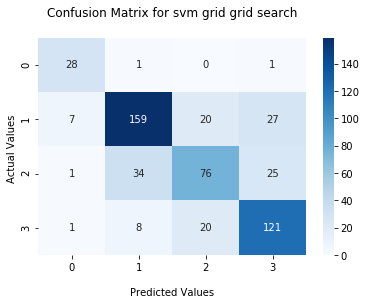

In [39]:
create_and_plot_confusion_matrix(y_test, svc_grid_predicitions, "svm grid grid search")